In [2]:
# useful to autoreload the module without restarting the kernel
%load_ext autoreload
%autoreload 2

In [3]:
from mppi import InputFiles as I, Calculators as C, Utilities as U
import os

In [4]:
omp = 1
mpi_run = 'mpirun -np 8'

# Analysis of the Dos

## From PyBigDFT

In [28]:
import numpy as np

In [29]:
energies = np.array([-0.815924953235059, -0.803163374736654,
                         -0.780540200987971, -0.7508806541364,
                         -0.723626807289917, -0.714924448617026,
                         -0.710448085701742, -0.68799028016451,
                         -0.67247569974853, -0.659038909236607,
                         -0.625396293324399, -0.608009041659988,
                         -0.565337910777367, -0.561250536074343,
                         -0.551767438323268, -0.541295070404525,
                         -0.532326667587434, -0.515961980147107,
                         -0.474601108285518, -0.473408476151224,
                         -0.46509070541069, -0.445709086452906,
                         -0.433874403837837, -0.416121660651406,
                         -0.407871082254237, -0.406123490618786,
                         -0.403004188319382, -0.38974739285104,
                         -0.380837488456638, -0.375163102271681,
                         -0.375007771592681, -0.367898783582561,
                         -0.367518948507212, -0.359401585874402,
                         -0.358189406008502, -0.354517727598174,
                         -0.334286389724978, -0.332921810616845,
                         -0.315466259109401, -0.308028853904577,
                         -0.29864142362141, -0.294024743731349,
                         -0.292104129933301, -0.285165738729842,
                         -0.28419932605141, -0.267399999874122,
                         -0.259487769142101, -0.239899780812716,
                         -0.224858003804207, -0.20448050758473,
                         -0.164155133452971, -0.117617164459898,
                         -0.0717938081884113, -0.0526986239898579,
                         -0.0346031190163735, -0.0167949342608791,
                         -0.0135168064347152, -0.0102971895842409,
                         0.00759271179427191, 0.00974950976249545,
                         0.010176021051287, 0.0217652761059223,
                         0.0239924727094222, 0.0413057846713024,
                         0.0422334333464529, 0.0459150454793617,
                         0.0517637894860314])
    

In [30]:
dos = U.DoS(energies=energies, fermi_level=-0.1,sigma = 0.01)

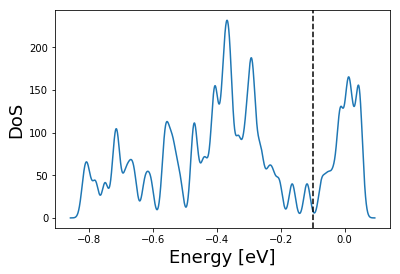

In [31]:
%matplotlib inline
#dos.append(0.2+energies)
dos.plot()

## From yambopy

In [10]:
from yambopy.dbs import electronsdb as E, savedb as S, latticedb as L

In [11]:
#lat = L.YamboLatticeDB.from_db_file('QeCalculator_test/si_nscf_test1.save/SAVE/ns.db1')
lat = L.YamboLatticeDB.from_db_file('QeCalculator_test/gaas_nscf_so.save/SAVE/ns.db1')

In [12]:
#db = E.YamboElectronsDB(lat,save = 'QeCalculator_test/si_nscf_test1.save/SAVE')
db = E.YamboElectronsDB(lat,save = 'QeCalculator_test/gaas_nscf_so.save/SAVE/')

In [13]:
e,d = db.getDOS()

In [14]:
import matplotlib.pyplot as plt

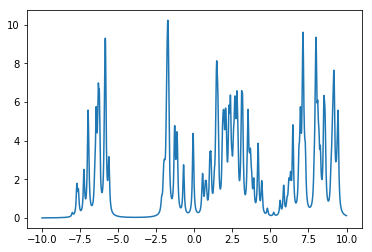

In [15]:
plt.plot(e,d)

In [16]:
db.eigenvalues_ibz

masked_array(
  data=[[-8.010891  , -8.010891  ,  4.442551  ,  4.442551  ,  4.7992015 ,
          4.7992015 ,  4.7992015 ,  4.7992015 ,  5.2171917 ,  5.2171917 ,
          8.363307  ,  8.363307  ],
        [-7.714617  , -7.714617  ,  1.9519345 ,  1.9519345 ,  4.200889  ,
          4.200889  ,  4.428956  ,  4.428956  ,  6.3237233 ,  6.3237233 ,
          8.979715  ,  8.979716  ],
        [-6.9417343 , -6.9417343 , -0.70007646, -0.70007646,  3.6816008 ,
          3.6816008 ,  3.903444  ,  3.903444  ,  5.8700404 ,  5.8700404 ,
          9.385439  ,  9.385439  ],
        [-6.367676  , -6.367676  , -1.9329164 , -1.9329164 ,  3.4784606 ,
          3.4784606 ,  3.6986926 ,  3.6986926 ,  5.6397414 ,  5.6397414 ,
          9.312462  ,  9.312462  ],
        [-7.613548  , -7.613548  ,  1.9417602 ,  1.9417602 ,  3.6193655 ,
          3.6193655 ,  3.76579   ,  3.76579   ,  7.1548815 ,  7.1548815 ,
          7.873896  ,  7.873896  ],
        [-6.9830675 , -6.9819217 , -0.08809471, -0.0676464 ,  2.80

In [17]:
db.lattice.kpoints_indexes

array([ 0,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,
        3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15])

In [43]:
from mppi import Parsers as P

In [58]:
#data = P.PwParser('QeCalculator_test/si_nscf_test1.save/data-file-schema.xml')
data = P.PwParser('QeCalculator_test/gaas_nscf_so.save/data-file-schema.xml')

Parse file : QeCalculator_test/gaas_nscf_so.save/data-file-schema.xml


In [59]:
data.evals*27.211396

array([[-8.01089067, -8.01089067,  4.4425513 ,  4.4425513 ,  4.79920153,
         4.79920153,  4.79920153,  4.79920153,  5.21719159,  5.21719159,
         8.36330804,  8.36330804],
       [-7.71461711, -7.71461711,  1.95193445,  1.95193445,  4.20088916,
         4.20088916,  4.42895595,  4.42895595,  6.32372366,  6.32372366,
         8.97971601,  8.97971608],
       [-6.94173439, -6.94173439, -0.70007646, -0.70007646,  3.68160099,
         3.68160099,  3.90344397,  3.90344397,  5.87004059,  5.87004059,
         9.3854398 ,  9.38543983],
       [-6.36767571, -6.36767571, -1.93291634, -1.93291634,  3.47846063,
         3.47846063,  3.69869277,  3.69869277,  5.63974131,  5.63974131,
         9.31246193,  9.31246193],
       [-7.6135485 , -7.6135485 ,  1.94176017,  1.94176017,  3.61936551,
         3.61936551,  3.76579003,  3.76579003,  7.15488109,  7.15488109,
         7.87389629,  7.87389629],
       [-6.98306729, -6.98192146, -0.08809471, -0.0676464 ,  2.80435051,
         2.858062  ,  

In [60]:
ss = 0.
for w in data.weights:
    ss+=w[0]
ss

0.99999999999996

In [61]:
data.spinorbit

True

In [68]:
data.spin_degen

1

In [102]:
import numpy as np

def histogram_eiv(eiv,weights,emin=-5.0,emax=5.0,step=0.01,sigma=0.05,ctype='lorentzian'):
    """
    Histogram of eigenvalues
    """
    eiv = np.array(eiv)

    x = np.arange(emin,emax,step,dtype=np.float32)
    y = np.zeros([len(x)],dtype=np.float32)

    if ctype == 'gaussian':
        c =  1.0/(sigma*sqrt(2))
        a = -1.0/(2*sigma)
    else:
        #lorentzian stuff
        s2 = (.5*sigma)**2
        c = (.5*sigma)

    eiv     = eiv.flatten()
    weights = weights.flatten()

    weights = weights[emin < eiv]
    eiv     = eiv[emin < eiv]
    weights = weights[eiv < emax]
    eiv     = eiv[eiv < emax]

    if ctype == 'gaussian':
        for e,w in zip(eiv,weights):
            x1 = (x-e)**2
            #add gaussian
            y += c*np.exp(a*x1)
    else:
        #lorentzian stuff
        for e,w in zip(eiv,weights):
            x1 = (x-e)**2
            #add lorentzian
            y += w*c/(x1+s2)
    return x, y